In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('train.csv')

In [3]:
# Check for missing values
missing_values = df.isnull().sum()
print('Columns with missing values: ' )
print(missing_values)

Columns with missing values: 
full_name              0
registered_year       54
engine_capacity        9
insurance              5
transmission_type      0
kms_driven             3
owner_type            36
fuel_type              0
max_power             89
seats                  7
mileage              407
body_type              0
city                   0
resale_price_Lakh      0
dtype: int64


In [4]:
# Check for duplicates
duplicate_rows = df[df.duplicated()]
print('Columns with duplicate values: ')
print(duplicate_rows)

Columns with duplicate values: 
                                        full_name registered_year  \
1242             2022 Maruti Eeco CNG 5 Seater AC            2022   
1778                     2019 Jaguar XE Portfolio            2019   
2250                   2010 Hyundai i10 Magna 1.1            2010   
2265                        2011 BMW X1 sDrive20d            2011   
3028                  2016 Honda Mobilio V i-DTEC            2016   
...                                           ...             ...   
13736  2010 Volkswagen Polo Diesel Trendline 1.2L            2010   
13742   2015 Ford Ecosport 1.5 Ti VCT AT Titanium            2015   
13787                 2015 Volkswagen Polo GT TSI            2015   
13877            2020 Hyundai i20 Magna Plus BSIV            2020   
13889                     2017 Mahindra XUV500 W4            2017   

      engine_capacity              insurance transmission_type    kms_driven  \
1242          1196 cc  Third Party insurance            Man

In [5]:
# Check for model cars with missing values in the 'seats' column
distinct_full_names_with_blank_seats = df[df['seats'].isnull()]['full_name'].unique()
print('Distinct full names with blank seats:')
for full_name in distinct_full_names_with_blank_seats:
    print(full_name)


Distinct full names with blank seats:
2009 Maruti Estilo LXI
2019 Nissan Kicks Diesel
2008 Ford Endeavour 3.0 4x4 Thunder Plus
2010 Maruti Estilo LXI


In [69]:
#elina brancos ou NAN quando é float
df = df.dropna(subset=['kms_driven'])

In [64]:
#remove cc from engine_capacity
df['engine_capacity'] = df['engine_capacity'].str.replace('cc', '')
#remove kms from kms_driven
df['kms_driven'] = df['kms_driven'].str.replace('Kms', '')
# Remover vírgula e espaço em branco da coluna 'kms_driven'
df['kms_driven'] = df['kms_driven'].str.replace(',', '').str.strip()


AttributeError: Can only use .str accessor with string values!

In [7]:
#passar 'owner_type' para numero e converter em float
df['owner_type'] = df['owner_type'].replace({
    'First Owner': '1',
    'Second Owner': '2',
    'Third Owner': '3',
    'Fourth Owner': '4',
    'Fifth Owner': '5'
}).astype(float)
print(df['owner_type'])

0        1.0
1        3.0
2        2.0
3        1.0
4        1.0
        ... 
13951    2.0
13952    1.0
13953    2.0
13954    2.0
13955    1.0
Name: owner_type, Length: 13956, dtype: float64


In [8]:
# Change the data types of multiple columns
df = df.astype({
    'full_name': 'string',
    'engine_capacity': float,
    'insurance': 'string',
    'transmission_type': 'string',
    'kms_driven': float,
    'owner_type': float,
    'fuel_type': 'string',
    'max_power': 'string',
    'seats': float,
    'mileage': 'string',
    'body_type': 'string',
    'city': 'string',
    'resale_price_Lakh': float
})



In [111]:
# Check data types
data_types = df.dtypes
print("Data type by column:")
print(data_types)

Data type by column:
full_name                  string[python]
registered_year                    object
engine_capacity                   float64
insurance                  string[python]
transmission_type          string[python]
kms_driven                        float64
owner_type                        float64
fuel_type                  string[python]
max_power                         float64
seats                             float64
mileage                    string[python]
body_type                  string[python]
city                       string[python]
resale_price_Lakh                 float64
max_power_group                  category
kms_group                        category
engine_capacity_group            category
kms_group_numeric                 float64
max_power_group_numeric           float64
dtype: object


In [88]:
contagem_valores = df['max_power_group'].value_counts()
print(contagem_valores)



max_power_group
0-100 bhp      8346
100-200 bhp    5039
200-300 bhp     367
300-400 bhp      60
400-500 bhp      10
500-600 bhp       6
Name: count, dtype: int64


In [92]:
subset = df[df['kms_group_numeric'] == 0][['kms_group', 'kms_group_numeric']]
print(subset)
distinct_values = df['kms_group_numeric'].unique()
num_distinct_values = len(distinct_values)


correspondencia = df[['kms_group', 'kms_group_numeric']].drop_duplicates()
print(correspondencia)

Empty DataFrame
Columns: [kms_group, kms_group_numeric]
Index: []
                    kms_group  kms_group_numeric
0               Até 50.000 km                1.0
2      50.000 km a 150.000 km                2.0
156   150.000 km a 300.000 km                3.0
2693      Acima de 900.000 km                6.0
4876  600.000 km a 900.000 km                5.0
7819  300.000 km a 600.000 km                4.0


In [108]:
#mostra que os grupos foram bem feitos
subset = df[df['max_power_group_numeric'] == 0][['max_power_group', 'max_power_group_numeric']]
print(subset)
distinct_values = df['max_power_group_numeric'].unique()
num_distinct_values = len(distinct_values)


correspondencia = df[['max_power_group', 'max_power_group_numeric']].drop_duplicates()
print(correspondencia)




Empty DataFrame
Columns: [max_power_group, max_power_group_numeric]
Index: []
     max_power_group  max_power_group_numeric
0          0-100 bhp                        6
2        100-200 bhp                        5
5        200-300 bhp                        4
265      300-400 bhp                        3
1577     500-600 bhp                        1
2656     400-500 bhp                        2


In [110]:
# Verificar nulos na coluna 'max_power_group'
nulos_max_power_group = df['max_power_group'].isnull().sum()
print(nulos_max_power_group)

# Criar uma nova coluna 'max_power_group_numeric' com base na classificação da coluna 'max_power_group'
df['max_power_group_numeric'] = df['max_power_group'].astype('category').cat.codes.max() - df['max_power_group'].astype('category').cat.codes

# Adicionar 1 para começar a numeração de 1
df['max_power_group_numeric'] += 1

# Imprimir o DataFrame com as novas colunas
print(df[['max_power_group', 'max_power_group_numeric']])

# Converter a coluna 'max_power_group_numeric' para float
df['max_power_group_numeric'] = df['max_power_group_numeric'].astype(float)



0
      max_power_group  max_power_group_numeric
0           0-100 bhp                        6
1           0-100 bhp                        6
2         100-200 bhp                        5
3         100-200 bhp                        5
4           0-100 bhp                        6
...               ...                      ...
13951     100-200 bhp                        5
13952       0-100 bhp                        6
13953     100-200 bhp                        5
13954       0-100 bhp                        6
13955       0-100 bhp                        6

[13828 rows x 2 columns]


In [107]:
kms_group_counts = df['kms_group'].value_counts()
print(kms_group_counts)
# Criar uma nova coluna 'kms_group_numeric' com base na classificação da coluna 'kms_group'
df['kms_group_numeric'] = df['kms_group'].astype('category').cat.codes + 1

# Imprimir o DataFrame com a nova coluna
print(df[['kms_group', 'kms_group_numeric']])

kms_group_counts2 = df['kms_group_numeric'].value_counts()
print(kms_group_counts2)

#converte a coluna para float
df['kms_group_numeric'] = df['kms_group_numeric'].astype(float)
correspondencia = df[['kms_group', 'kms_group_numeric']].drop_duplicates()
print(correspondencia)



kms_group
50.000 km a 150.000 km     7669
Até 50.000 km              5989
150.000 km a 300.000 km     164
300.000 km a 600.000 km       2
600.000 km a 900.000 km       2
Acima de 900.000 km           2
Name: count, dtype: int64
                    kms_group  kms_group_numeric
0               Até 50.000 km                  1
1               Até 50.000 km                  1
2      50.000 km a 150.000 km                  2
3               Até 50.000 km                  1
4      50.000 km a 150.000 km                  2
...                       ...                ...
13951  50.000 km a 150.000 km                  2
13952           Até 50.000 km                  1
13953  50.000 km a 150.000 km                  2
13954           Até 50.000 km                  1
13955           Até 50.000 km                  1

[13828 rows x 2 columns]
kms_group_numeric
2    7669
1    5989
3     164
6       2
5       2
4       2
Name: count, dtype: int64
                    kms_group  kms_group_numeric
0    

In [52]:
#ver quais os valores que tem body_type errado
honda_rows = df[df['body_type'] == 'Chevrolet']
print(honda_rows)


Empty DataFrame
Columns: [full_name, registered_year, engine_capacity, insurance, transmission_type, kms_driven, owner_type, fuel_type, max_power, seats, mileage, body_type, city, resale_price_Lakh, max_power_group, kms_group, engine_capacity_group]
Index: []


In [11]:

# Exibe os tipos únicos e suas contagens na coluna 'body_type'
contagem_body_types = df['body_type'].value_counts()

# Exibe o resultado
print(contagem_body_types)

body_type
Hatchback        5890
Sedan            3819
SUV              3524
MUV               600
Minivans           53
Maruti             17
Pickup              9
Coupe               9
Cars                6
Mercedes-Benz       6
Tata                5
Wagon               3
Mahindra            2
Jaguar              2
Convertibles        2
Volvo               1
Skoda               1
Isuzu               1
Toyota              1
Datsun              1
Hyundai             1
Honda               1
BMW                 1
Chevrolet           1
Name: count, dtype: Int64


In [12]:
import pandas as pd

# Assuming df is your DataFrame

df.loc[df['full_name'].isin(['2009 Maruti Estilo LXI', '2019 Nissan Kicks Diesel', '2010 Maruti Estilo LXI', '2019 Maruti Wagon R ZXI AMT 1.2BSIV',
                             '2016 Mercedes-Benz B Class B180 Sport', '2016 Mercedes-Benz A Class A200 D Sport Edition',
                             '2004 Tata Indigo Marina GLX', '2017 Volvo V40 D3 R Design']), 'body_type'] = 'Hatchback'
df.loc[df['full_name'].isin(['2005 Tata Sumo Victa EX 10/7 Str BSII', '2008 Tata Sumo CX', '2010 Tata New Safari DICOR 2.2 EX 4x2', 
                             '2017 Mahindra KUV 100 mFALCON G80 K8', '2019 Mahindra Bolero Camper GOLD ZX 2WD']), 'body_type'] = 'SUV'
df.loc[df['full_name'].isin(['2015 Honda Mobilio E i-DTEC', '2018 Maruti Eeco 5 Seater AC BSIV', '2016 Datsun GO Plus A']), 'body_type'] = 'MUV'
df.loc[df['full_name'].isin(['2021 BMW 7 Series 730Ld DPE Signature','2006 Hyundai Accent CRDi', '2007 Maruti SX4 Vxi BSIII',
                             '2020 Mercedes-Benz S-Class Maybach S560', '2004 Skoda Octavia 1.8 Turbo Petrol RS MT']), 'body_type'] = 'Sedan'
df.loc[df['full_name'].isin(['2012 Mercedes-Benz SLK-Class SLK 350', '2013 Mercedes-Benz E-Class E350 Cabriolet', 
                             '2009 Mercedes-Benz SLK-Class 55 AMG']), 'body_type'] = 'Convertibles'
df.loc[df['full_name'] == '2011 Jaguar XK R V8 Coupe', 'body_type'] = 'Coupe'
df.loc[df['full_name'].isin(['2015 Chevrolet Enjoy 1.4 LS 7', '2004 Maruti Versa DX2 8-SEATER BSIII TWIN A/C', '2021 Maruti Eeco 5 STR With AC Plus HTR CNG',
                             '2022 Maruti Eeco 5 Seater AC 2020-2022', '2022 Maruti Eeco 5 Seater AC BSVI', '2017 Maruti Eeco Flexi Green', 
                             '2013 Maruti Omni Limited Edition', '2021 Maruti Eeco CNG 5 Seater AC', '2019 Maruti Eeco CNG 5 Seater AC BSIV', 
                             '2019 Maruti Eeco 5 Seater AC', '2013 Maruti Eeco 5 Seater Standard BSIV', '2015 Maruti Omni CNG', 
                             '2015 Maruti Omni MPI CARGO BSIV', '2016 Maruti Eeco CNG 5 Seater AC BSIV', '2013 Toyota Innova 2.5 E Diesel MS 7-seater',
                             '2015 Chevrolet Enjoy 1.4 LS 7']), 'body_type'] = 'Minivans'
df.loc[df['full_name'].isin(['2014 Tata Xenon XT EX 4X2', '2019 Isuzu D-Max High']), 'body_type'] = 'Pickup'

# Check
distinct_full_names_with_blank_body_type = df[df['body_type'].isnull()]['full_name'].unique()
print('Distinct full names with blank body_type:')
for full_name in distinct_full_names_with_blank_body_type:
    print(full_name)


Distinct full names with blank body_type:


In [13]:
# Update number of seats based on conditions
df.loc[df['full_name'].isin(['2009 Maruti Estilo LXI', '2019 Nissan Kicks Diesel', '2010 Maruti Estilo LXI']), 'seats'] = 5
df.loc[df['full_name'] == '2008 Ford Endeavour 3.0 4x4 Thunder Plus', 'seats'] = 7

# Check
distinct_full_names_with_blank_seats = df[df['seats'].isnull()]['full_name'].unique()
print('Distinct full names with blank seats:')
for full_name in distinct_full_names_with_blank_seats:
    print(full_name)

Distinct full names with blank seats:


In [101]:
import re

Correct_Max_Power = []
for power in df['max_power']:
    if pd.notna(power):
        if isinstance(power, str):
            if 'bhp' in power:
                num_bhp = float(re.search(r'\d+.?\d', power).group())
                Correct_Max_Power.append(num_bhp)
            elif 'PS' in power:
                num_ps = float(re.search(r'\d+.?\d', power).group())
                num_bhp = round(num_ps * 0.98632, 2)
                Correct_Max_Power.append(num_bhp)
            else:
                num = re.search(r'\d+\.?\d*', power)
                Correct_Max_Power.append(float(num.group()) if num else None)
        else:
            Correct_Max_Power.append(power)
    else:
        Correct_Max_Power.append(None)


# Converter os valores não NaN para float
Correct_Max_Power = [float(value) if value is not None else value for value in Correct_Max_Power]

df['max_power'] = Correct_Max_Power





In [102]:
# Remover linhas com NaN na coluna 'max_power'
df = df.dropna(subset=['max_power'])
print(df['max_power'])

0         83.8
1         88.7
2        117.3
3        167.6
4         83.1
         ...  
13951    197.2
13952     81.8
13953    108.6
13954     88.5
13955     86.7
Name: max_power, Length: 13828, dtype: float64


In [16]:
# Removendo espaços em branco na coluna 'owner_type'
df.dropna(subset=['owner_type'], inplace=True)

# Verificando os valores únicos após a remoção dos espaços em branco
unique_values = df['owner_type'].unique()
print(unique_values)

[1. 3. 2. 5. 4.]


In [17]:
# Calculando a média dos valores da coluna 'resale' para cada número na coluna 'owner_type'
resale_means = df.groupby('owner_type')['resale_price_Lakh'].mean()

print(resale_means)

owner_type
1.0    9.613698
2.0    7.377456
3.0    5.181408
4.0    3.809587
5.0    2.329250
Name: resale_price_Lakh, dtype: float64


In [18]:
# Verificando a frequência de cada número na coluna 'owner_type'
frequency = df['owner_type'].value_counts()
print(frequency)

owner_type
1.0    9779
2.0    3366
3.0     626
4.0     109
5.0      40
Name: count, dtype: int64


In [19]:
# unique 'fuel_type'
valores_unicos_fuel_type = df['fuel_type'].unique()
print(valores_unicos_fuel_type)

<StringArray>
['Petrol', 'Diesel', 'CNG', 'Electric', 'LPG']
Length: 5, dtype: string


In [20]:
#CHECK AND CREAT ID ______________________________________________________________

In [21]:
import numpy as np

# Sua coluna de tipos de corpo
body_types = df['body_type']

# Número de documentos (ou entradas) no DataFrame
n_docs = len(df)

# Dicionário para armazenar os valores IDF
idf = {}

# Usando drop_duplicates para obter valores únicos
unique_body_types = body_types.drop_duplicates()

# Calcula o IDF para cada tipo de corpo
for body_type in unique_body_types:
    k = sum(body_type in df['body_type'][i] for i in range(n_docs))
    idf[body_type] = np.log10(n_docs / (k + 1))  # Adicionei +1 para evitar divisão por zero

# Exibe os resultados
for body_type, value in idf.items():
    print(f'{body_type:>15}: {value:>10}')


KeyError: 206

In [22]:
#Check ID_fuel_type

# Sua coluna de tipos de combustível
fuel_types = df['fuel_type']

# Número de documentos (ou entradas) no DataFrame
n_docs = len(df)

idf = {}

# Usando drop_duplicates para obter valores únicos
unique_fuel_types = fuel_types.drop_duplicates()

for fuel_type in unique_fuel_types:
    k = sum(fuel_type in df['fuel_type'][i] for i in range(n_docs))  # contagem de documentos que contêm este tipo de combustível
    idf[fuel_type] = np.log10(n_docs / (k + 1))  # Adicionei +1 para evitar divisão por zero


for fuel_type, value in idf.items():
    print(f'{fuel_type:>15}: {value:>10}')

KeyError: 206

In [23]:
#Create fuel_type ID: IDF

fuel_types = df['fuel_type']

# Número de entradas no DataFrame
n_docs = len(df)

idf = {}

# valores únicos
unique_fuel_types = fuel_types.drop_duplicates()

for fuel_type in unique_fuel_types:
    k = sum(fuel_type in df['fuel_type'][i] for i in range(n_docs))  # contagem de 1 tipo de combustível
    idf[fuel_type] = np.log10(n_docs / (k + 1))  # evitar divisão por zero

# Criar nova coluna 'idf' no DataFrame
df['id_fuel_type'] = df['fuel_type'].map(idf)

# Se desejar imprimir o DataFrame com a nova coluna
print(df)


KeyError: 206

In [52]:

# fuel_type_id = {
#     'Petrol': 0.01,
#     'Diesel': 0.02,
#     'CNG': 0.12,
#     'Electric': 1.02,
#     'LPG': 2.27
# }
# df['fuel_type_id'] = df['fuel_type'].map(fuel_type_id)
# df['fuel_type_id'] = df['fuel_type_id'].astype(float)
# df[['fuel_type', 'fuel_type_id']]

#testar com a abordagem IDF


,fuel_type,fuel_type_id
0,Petrol,0.01
1,Petrol,0.01
2,Petrol,0.01
3,Diesel,0.02
4,Petrol,0.01
...,...,...
13951,Diesel,0.02
13952,Petrol,0.01
13953,Diesel,0.02
13954,Diesel,0.02


In [12]:
# max min mean 
# min_values = df['seats'].min(), df['resale_price_Lakh'].min()
# print("Min value (seats, resale price): ")
# print(min_values)
# max_values = df['seats'].max(), df['resale_price_Lakh'].max()
# print("Max value(seats, resale price): ")
# print(max_values)
# mean_values = df['seats'].mean(), df['resale_price_Lakh'].mean()
# print("Medium value(seats, resale price): ")
# print(mean_values)

Min value (seats, resale price): 
(2.0, 0.28)
Max value(seats, resale price): 
(10.0, 225.0)
Medium value(seats, resale price): 
(5.20213528231585, 8.845202874032676)


In [ ]:
#MIN MAX___________________________________________________________________-

In [24]:
#see for the minimum and maximum value of resale what is the seats
# min 
min_resale_index = df['resale_price_Lakh'].idxmin()
min= df.loc[min_resale_index, 'seats']
min_resale_price = df['resale_price_Lakh'].min()

# max
max_resale_index = df['resale_price_Lakh'].idxmax()
max = df.loc[max_resale_index, 'seats']
max_resale_price = df['resale_price_Lakh'].max()


print("Min price: ", min_resale_price, "seats: ", min)
print("Max price: ", max_resale_price, "seats: ", max)

Min price:  0.28 seats:  5.0
Max price:  225.0 seats:  5.0


In [25]:
#see for the minimum and maximum value of resale what is the fuel_type
# min 
min_resale_index = df['resale_price_Lakh'].idxmin()
min= df.loc[min_resale_index, 'fuel_type']
min_resale_price = df['resale_price_Lakh'].min()

# max
max_resale_index = df['resale_price_Lakh'].idxmax()
max = df.loc[max_resale_index, 'fuel_type']
max_resale_price = df['resale_price_Lakh'].max()


print("Min price: ", min_resale_price, "fuel_type: ", min)
print("Max price: ", max_resale_price, "fuel_type: ", max)


Min price:  0.28 fuel_type:  Petrol
Max price:  225.0 fuel_type:  Diesel


In [26]:
#see for the minimum and maximum value of resale what is the number of engine_capacity
# min 
min_resale_index = df['resale_price_Lakh'].idxmin()
min_seats = df.loc[min_resale_index, 'engine_capacity']
min_resale_price = df['resale_price_Lakh'].min()

# max
max_resale_index = df['resale_price_Lakh'].idxmax()
max_seats = df.loc[max_resale_index, 'engine_capacity']
max_resale_price = df['resale_price_Lakh'].max()


print("Min price: ", min_resale_price, "engine_capacity: ", min_seats)
print("Max price: ", max_resale_price, "engine_capacity: ", max_seats)


Min price:  0.28 engine_capacity:  796.0
Max price:  225.0 engine_capacity:  2925.0


In [28]:
# Encontrando o menor valor de kms_driven e seu preço correspondente
min_kms_index = df['kms_driven'].idxmin()
min_kms_value = df.loc[min_kms_index, 'kms_driven']
min_kms_price = df.loc[min_kms_index, 'resale_price_Lakh']

# Encontrando o maior valor de kms_driven e seu preço correspondente
max_kms_index = df['kms_driven'].idxmax()
max_kms_value = df.loc[max_kms_index, 'kms_driven']
max_kms_price = df.loc[max_kms_index, 'resale_price_Lakh']

print(f"Menor quilometragem: {min_kms_value} kms, Preço: {min_kms_price} Lakh")
print(f"Maior quilometragem: {max_kms_value} kms, Preço: {max_kms_price} Lakh")

Menor quilometragem: 286.0 kms, Preço: 89.5 Lakh
Maior quilometragem: 1200000.0 kms, Preço: 11.5 Lakh


In [29]:
#coluna rafa
#see for the minimum and maximum value of resale what is the number of Kms_driven

# min 
min_resale_index = df['resale_price_Lakh'].idxmin()
min_kms = df.loc[min_resale_index, 'kms_driven']
min_resale_price = df['resale_price_Lakh'].min()

# max
max_resale_index = df['resale_price_Lakh'].idxmax()
max_kms = df.loc[max_resale_index, 'kms_driven']
max_resale_price = df['resale_price_Lakh'].max()


print("Min price: ", min_resale_price, "kms_driven: ", min_kms)
print("Max price: ", max_resale_price, "kms_driven: ", max_kms)

Min price:  0.28 kms_driven:  30000.0
Max price:  225.0 kms_driven:  36000.0


In [30]:
#coluna rafa
#see for the minimum and maximum value of resale what is the number of max_power

# min 
min_resale_index = df['resale_price_Lakh'].idxmin()
min_kms = df.loc[min_resale_index, 'max_power']
min_resale_price = df['resale_price_Lakh'].min()

# max
max_resale_index = df['resale_price_Lakh'].idxmax()
max_kms = df.loc[max_resale_index, 'max_power']
max_resale_price = df['resale_price_Lakh'].max()


print("Min price: ", min_resale_price, "max_power: ", min_kms)
print("Max price: ", max_resale_price, "max_power: ", max_kms)

Min price:  0.28 max_power:  47.3
Max price:  225.0 max_power:  281.6


In [31]:
# Encontrando o menor valor de max_power e seu preço correspondente
min_power_index = df['max_power'].idxmin()
min_power_value = df.loc[min_power_index, 'max_power']
min_power_price = df.loc[min_power_index, 'resale_price_Lakh']

# Encontrando o maior valor de max_power e seu preço correspondente
max_power_index = df['max_power'].idxmax()
max_power_value = df.loc[max_power_index, 'max_power']
max_power_price = df.loc[max_power_index, 'resale_price_Lakh']

print(f"Menor max_power: {min_power_value} bhp, Preço: {min_power_price} Lakh")
print(f"Maior max_power: {max_power_value} bhp, Preço: {max_power_price} Lakh")


Menor max_power: 25.4 bhp, Preço: 2.75 Lakh
Maior max_power: 558.0 bhp, Preço: 59.5 Lakh


In [ ]:
#CREATE GROUPS_______________________________________________________________________-

In [32]:
# create groups: max_power

# define os limites dos grupos
limites = [0, 100, 200, 300, 400, 500, 600]  
rotulos = ['0-100 bhp', '100-200 bhp', '200-300 bhp', '300-400 bhp', '400-500 bhp', '500-600 bhp']

# nova coluna 'max_power_group'
df['max_power_group'] = pd.cut(df['max_power'], bins=limites, labels=rotulos, right=False)

print(df)


                                               full_name registered_year  \
0                                2019 Tata Tiago XZ Plus        Nov 2019   
1                              2018 Honda WR-V i-VTEC VX        Apr 2018   
2                              2015 Honda City i VTEC SV        May 2015   
3      2021 Tata New Safari XZA Plus Adventure Editio...            2021   
4                        2019 Maruti Baleno 1.2 CVT Zeta        Jun 2019   
...                                                  ...             ...   
13951                          2021 Kia Carnival Premium            2021   
13952               2017 Hyundai i20 1.2 Magna Executive        Dec 2017   
13953             2017 Skoda Rapid 1.5 TDI Ambition BSIV        Jan 2018   
13954                      2017 Maruti Vitara Brezza ZDi        Apr 2017   
13955                         2015 Honda Amaze S i-Vtech        Mar 2015   

       engine_capacity              insurance transmission_type  kms_driven  \
0       

In [77]:
# define os limites dos grupos
limites = [0, 50000, 150000, 300000, 600000, 900000, float('inf')]  
rotulos = ['Até 50.000 km', '50.000 km a 150.000 km', '150.000 km a 300.000 km', '300.000 km a 600.000 km', '600.000 km a 900.000 km', 'Acima de 900.000 km']

# cria a nova coluna
df['kms_group'] = pd.cut(df['kms_driven'], bins=limites, labels=rotulos, right=False)

# Incluir a linha com 'kms_driven' igual a 1200000 na última categoria
df.loc[df['kms_driven'] == 1200000, 'kms_group'] = 'Acima de 900.000 km'

print(df)



                                               full_name registered_year  \
0                                2019 Tata Tiago XZ Plus        Nov 2019   
1                              2018 Honda WR-V i-VTEC VX        Apr 2018   
2                              2015 Honda City i VTEC SV        May 2015   
3      2021 Tata New Safari XZA Plus Adventure Editio...            2021   
4                        2019 Maruti Baleno 1.2 CVT Zeta        Jun 2019   
...                                                  ...             ...   
13951                          2021 Kia Carnival Premium            2021   
13952               2017 Hyundai i20 1.2 Magna Executive        Dec 2017   
13953             2017 Skoda Rapid 1.5 TDI Ambition BSIV        Jan 2018   
13954                      2017 Maruti Vitara Brezza ZDi        Apr 2017   
13955                         2015 Honda Amaze S i-Vtech        Mar 2015   

       engine_capacity              insurance transmission_type  kms_driven  \
0       

In [34]:
# create groups: engine_capacity

# defines the groups limit
limites = [0,1, 1000, 2000, 3000, 4000, float('inf')]  
rotulos = ['Elétrico', 'até 1000 cc', 'até 2000 cc', 'até 3000 cc', 'até 4000 cc', 'mais de 4000 cc']

# new column'engine_capacity_group' 
df['engine_capacity_group'] = pd.cut(df['engine_capacity'], bins=limites, labels=rotulos, right=False)

print(df)


                                               full_name registered_year  \
0                                2019 Tata Tiago XZ Plus        Nov 2019   
1                              2018 Honda WR-V i-VTEC VX        Apr 2018   
2                              2015 Honda City i VTEC SV        May 2015   
3      2021 Tata New Safari XZA Plus Adventure Editio...            2021   
4                        2019 Maruti Baleno 1.2 CVT Zeta        Jun 2019   
...                                                  ...             ...   
13951                          2021 Kia Carnival Premium            2021   
13952               2017 Hyundai i20 1.2 Magna Executive        Dec 2017   
13953             2017 Skoda Rapid 1.5 TDI Ambition BSIV        Jan 2018   
13954                      2017 Maruti Vitara Brezza ZDi        Apr 2017   
13955                         2015 Honda Amaze S i-Vtech        Mar 2015   

       engine_capacity              insurance transmission_type  kms_driven  \
0       

In [35]:
#AVG PRICE _________________________________________________

In [36]:
# Calcula a média do preço para cada rótulo da coluna 'kms_group'
media_por_grupo = df.groupby('max_power_group')['resale_price_Lakh'].mean()

print(media_por_grupo)

max_power_group
0-100 bhp       4.714217
100-200 bhp    12.598798
200-300 bhp    39.233569
300-400 bhp    68.414333
400-500 bhp    79.703000
500-600 bhp    40.625000
Name: resale_price_Lakh, dtype: float64


C:\Users\seari\AppData\Local\Temp\ipykernel_28224\4119760779.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_por_grupo = df.groupby('max_power_group')['resale_price_Lakh'].mean()


In [37]:
# Calcula a média do preço para cada rótulo da coluna 'kms_group'
media_por_grupo = df.groupby('kms_group')['resale_price_Lakh'].mean()

print(media_por_grupo)

kms_group
Até 50.000 km              11.286718
50.000 km a 150.000 km      6.969167
150.000 km a 300.000 km     5.171454
300.000 km a 600.000 km     5.800000
600.000 km a 900.000 km     7.650000
Acima de 900.000 km         9.750000
Name: resale_price_Lakh, dtype: float64


C:\Users\seari\AppData\Local\Temp\ipykernel_28224\1767189650.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_por_grupo = df.groupby('kms_group')['resale_price_Lakh'].mean()


In [38]:
#on average what is the price based on seats
average_price_by_seat= df.groupby('seats')['resale_price_Lakh'].mean()
print(average_price_by_seat)

seats
2.0     11.250000
4.0     16.669612
5.0      8.076871
6.0     13.244026
7.0     14.632633
8.0      8.877851
9.0      5.267059
10.0     2.887500
Name: resale_price_Lakh, dtype: float64


In [39]:
#on average what is the price based on eng
average_price_by_eng= df.groupby('engine_capacity_group')['resale_price_Lakh'].mean()
print(average_price_by_eng)

engine_capacity_group
Elétrico           28.326667
até 1000 cc         4.332731
até 2000 cc         8.164008
até 3000 cc        20.178232
até 4000 cc        29.984848
mais de 4000 cc    43.310000
Name: resale_price_Lakh, dtype: float64


C:\Users\seari\AppData\Local\Temp\ipykernel_28224\1365649427.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_price_by_eng= df.groupby('engine_capacity_group')['resale_price_Lakh'].mean()


In [40]:
#on average what is the price based on fuel_type
average_price_by_fuel = df.groupby('fuel_type')['resale_price_Lakh'].mean()
print(average_price_by_fuel)

fuel_type
CNG          4.843797
Diesel      12.940781
Electric    24.659362
LPG          1.803362
Petrol       6.911676
Name: resale_price_Lakh, dtype: float64


In [41]:
#on average what is the price based on kms_driven
average_price_by_seats = df.groupby('kms_group')['resale_price_Lakh'].mean()
print(average_price_by_seats)

kms_group
Até 50.000 km              11.286718
50.000 km a 150.000 km      6.969167
150.000 km a 300.000 km     5.171454
300.000 km a 600.000 km     5.800000
600.000 km a 900.000 km     7.650000
Acima de 900.000 km         9.750000
Name: resale_price_Lakh, dtype: float64


C:\Users\seari\AppData\Local\Temp\ipykernel_28224\4200223448.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_price_by_seats = df.groupby('kms_group')['resale_price_Lakh'].mean()


In [ ]:
#FREQUENCY___________________________________________________

In [42]:
# frequency 
frequencia_fueld = df['fuel_type'].value_counts()
print(frequencia_fueld)


fuel_type
Petrol      9053
Diesel      4395
CNG          403
Electric      47
LPG           22
Name: count, dtype: Int64


In [43]:
# frequency of each group 
frequencia_grupos = df['engine_capacity_group'].value_counts()
print(frequencia_grupos)
frequencia_grupos = df['kms_group'].value_counts()
print(frequencia_grupos)

engine_capacity_group
até 2000 cc        10288
até 1000 cc         2252
até 3000 cc         1278
Elétrico              39
até 4000 cc           33
mais de 4000 cc       21
Name: count, dtype: int64
kms_group
50.000 km a 150.000 km     7743
Até 50.000 km              5999
150.000 km a 300.000 km     169
300.000 km a 600.000 km       2
600.000 km a 900.000 km       2
Acima de 900.000 km           1
Name: count, dtype: int64


In [44]:
mode_values = df[["full_name", "registered_year", "engine_capacity", "insurance", "transmission_type", "kms_driven", "owner_type", "fuel_type", "max_power", "seats", "mileage", "body_type", "city", "resale_price_Lakh"]].mode().iloc[0]
print(mode_values)


full_name            2016 Hyundai Grand i10 Sportz
registered_year                               2017
engine_capacity                             1197.0
insurance                    Third Party insurance
transmission_type                           Manual
kms_driven                                120000.0
owner_type                                     1.0
fuel_type                                   Petrol
max_power                                     81.8
seats                                          5.0
mileage                                  18.9 kmpl
body_type                                Hatchback
city                                         Delhi
resale_price_Lakh                              4.5
Name: 0, dtype: object


In [ ]:
# CORRELATION W PRICE _______________________________________________________________

In [45]:
# calculate correlation only between VAR and 'resale_price_Lakh' columns
correlation = df[['seats', 'resale_price_Lakh']].corr()
print(correlation)


                      seats  resale_price_Lakh
seats              1.000000           0.128102
resale_price_Lakh  0.128102           1.000000


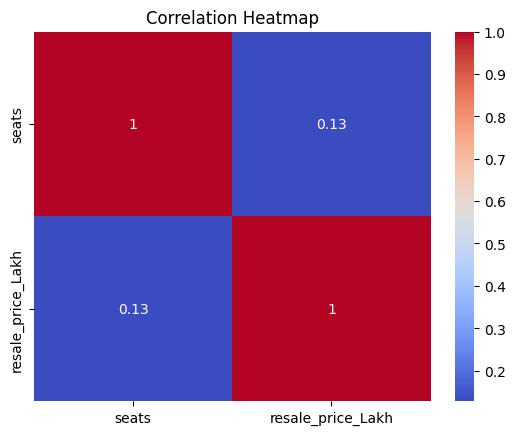

In [79]:
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

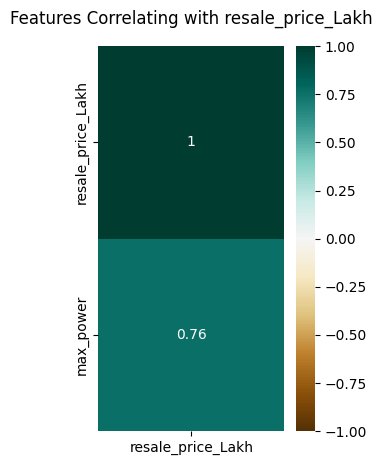

In [142]:
#correlation  with price - kms_driven

# Select columns
columns_of_interest = ['max_power', 'resale_price_Lakh']
subset_df = df[columns_of_interest]

plt.figure(figsize=(3, 5))

# Creat heatmap
heatmap = sns.heatmap(subset_df.corr()[['resale_price_Lakh']].sort_values(by='resale_price_Lakh', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with resale_price_Lakh', fontdict={'fontsize': 12}, pad=16)

plt.show()

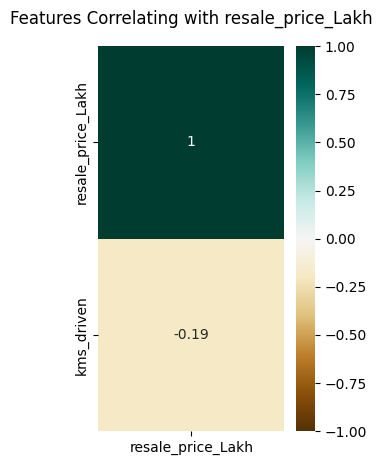

In [96]:
#correlation  with price - kms_driven

# Select columns
columns_of_interest = ['kms_driven', 'resale_price_Lakh']
subset_df = df[columns_of_interest]

plt.figure(figsize=(3, 5))

# Creat heatmap
heatmap = sns.heatmap(subset_df.corr()[['resale_price_Lakh']].sort_values(by='resale_price_Lakh', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with resale_price_Lakh', fontdict={'fontsize': 12}, pad=16)

plt.show()

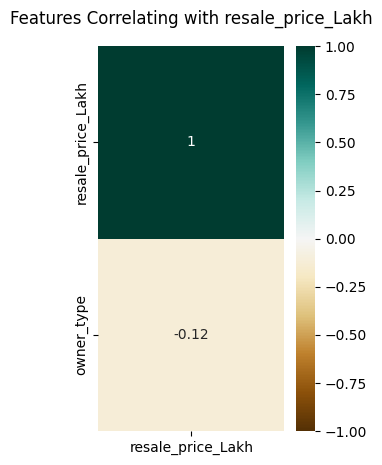

In [93]:
#correlation  with price - owner_type

# Select columns
columns_of_interest = ['owner_type', 'resale_price_Lakh']
subset_df = df[columns_of_interest]

plt.figure(figsize=(3, 5))

# Creat heatmap
heatmap = sns.heatmap(subset_df.corr()[['resale_price_Lakh']].sort_values(by='resale_price_Lakh', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with resale_price_Lakh', fontdict={'fontsize': 12}, pad=16)

plt.show()

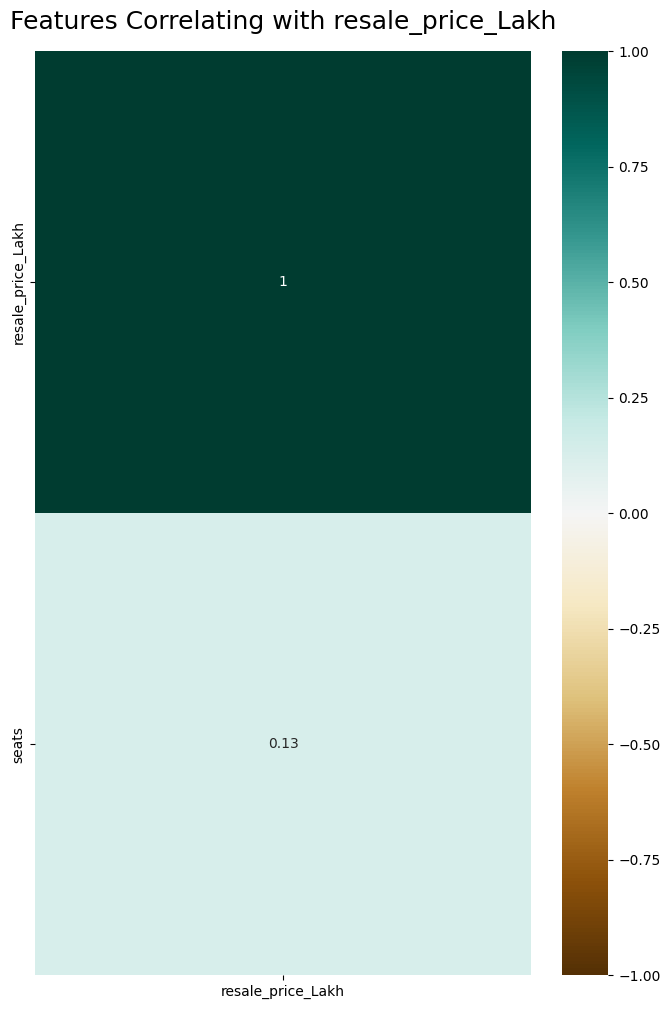

In [80]:
#correlation  with price

# Select columns
columns_of_interest = ['seats', 'resale_price_Lakh']
subset_df = df[columns_of_interest]

plt.figure(figsize=(8, 12))

# Creat heatmap
heatmap = sns.heatmap(subset_df.corr()[['resale_price_Lakh']].sort_values(by='resale_price_Lakh', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with resale_price_Lakh', fontdict={'fontsize': 18}, pad=16)

plt.show()

In [46]:
#correlation of all features with price

# Select columns
columns_of_interest = ['id_fuel_type','engine_capacity', 'kms_driven', 'resale_price_Lakh']
subset_df = df[columns_of_interest]

plt.figure(figsize=(8, 12))

# Creat heatmap
heatmap = sns.heatmap(subset_df.corr()[['resale_price_Lakh']].sort_values(by='resale_price_Lakh', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with resale_price_Lakh', fontdict={'fontsize': 18}, pad=16)

plt.show()


KeyError: "['id_fuel_type'] not in index"

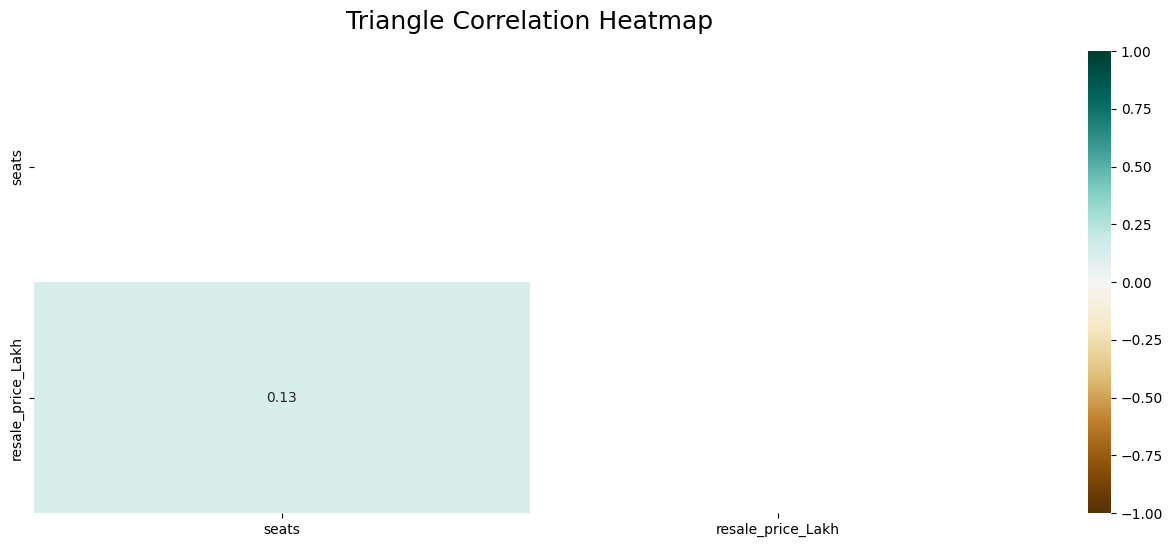

In [47]:
# Correlation triangular heatmap
# Select columns
columns_of_interest = ['seats', 'resale_price_Lakh']
subset_df = df[columns_of_interest]

plt.figure(figsize=(16, 6))

# Set the mask to only display the bottom half of the heatmap
mask = np.triu(np.ones_like(subset_df.corr(), dtype=bool))

# heatmap
heatmap = sns.heatmap(subset_df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize': 18}, pad=16)

plt.show()

Text(0.5, 1.0, 'Outliers year')

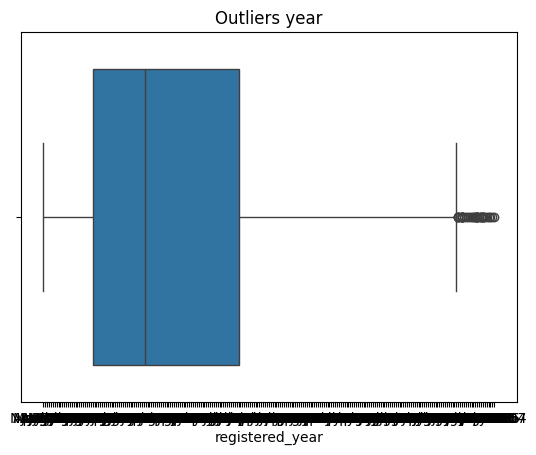

In [33]:
# sns.boxplot(data=df,x=df["registered_year"])
# plt.title("Outliers year")

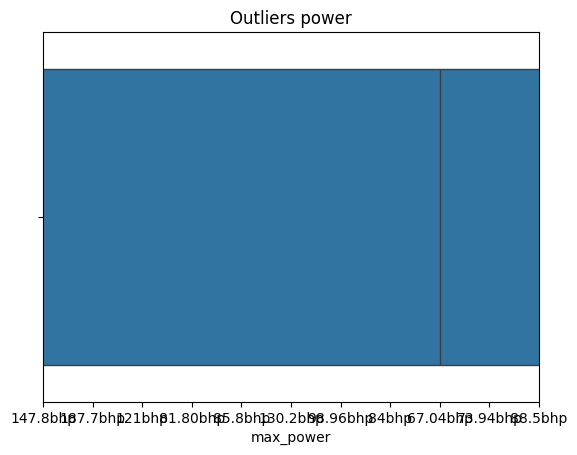

In [ ]:
# Create a box plot for the "max_power" column
# ax = sns.boxplot(data=df, x=df["max_power"])
# plt.title("Outliers power")

# Adjust the x-axis scale
# ax.set(xlim=(60, 70))  # Replace min_value and max_value with your desired limits

# Show the plot
# plt.show()

Text(0.5, 1.0, 'Outliers price')

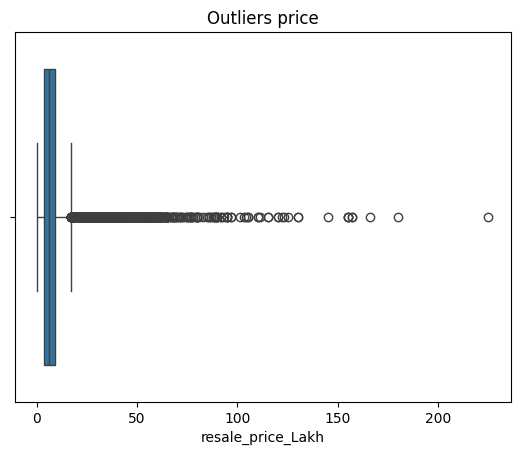

In [ ]:
# sns.boxplot(data=df,x=df["resale_price_Lakh"])
# plt.title("Outliers price")

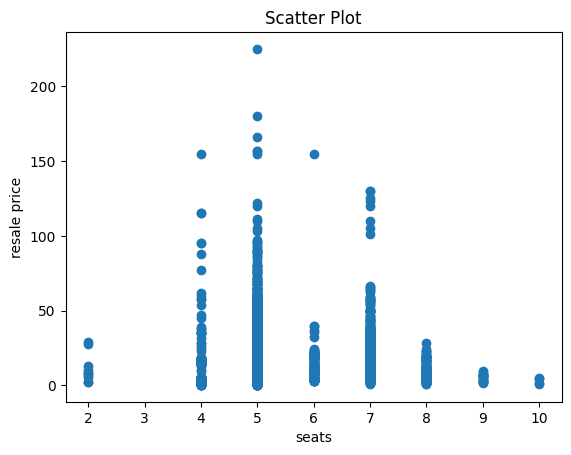

In [83]:
#Create scatter plot
plt.scatter(df['seats'], df['resale_price_Lakh'])
plt.title('Scatter Plot')
plt.xlabel('seats')
plt.ylabel('resale price')
plt.show()